In [1]:
library(metacell)
library(GEOquery)
library(googlesheets4)
library(googledrive)
library(devtools)
library(reshape2)
library(plyr)
library(dplyr)
library(tibble)
library(ggplot2)
library(tidyverse)
library(tgstat)
library(tgconfig)
library(gridExtra)
library(SingleCellExperiment)
library(Seurat)
library(babelgene)
library(zellkonverter)
library(liana)
library(ComplexHeatmap)
library(grid)
library(GOfuncR)
library(cowplot)
library(R.utils)
library(Hmisc)
library(corrplot)
library(pheatmap)
library(shades)
library(ggrepel)
library(ggarchery)
library(rstatix) 
library(RVAideMemoire)
library(cluster)   
library(factoextra) 
library(ggpmisc)
library(glmGamPoi)
library(MASS)
library(clusterProfiler)
library(msigdbr)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)


Attaching package: ‘googledrive’


The followi

The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:ComplexHeatmap’:

    draw


The following object is masked from ‘package:tidyr’:

    extract


The following object is masked from ‘package:GEOquery’:

    gunzip


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:R.utils’:

    capitalize


The following object is masked from ‘package:SeuratObject’:

    Key


The following object

In [2]:
source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/metacell_functions.r")
source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/pic_parser.r")

ℹ SHA-1 hash of file is "bda7f06ee7b168c0be4c723ee15644ab99e6421e"
Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: RANN

Loading required package: plotrix

Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:plotrix’:

    plotCI


The following object is masked from ‘package:shades’:

    space


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess


Loading required package: parallel

Loading required package: compositions

Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"



Attaching package: ‘compositions’


The following objects are masked from ‘package:IRanges’:

    cor, cov, var


The following objects are masked from ‘package:S4Vectors’:

    cor, c

In [3]:
modify_facet_appearance <- function(plot = NULL,
                                    strip.background.x.fill = NULL, 
                                    strip.background.y.fill = NULL,
                                    strip.background.x.col = NULL,
                                    strip.background.y.col = NULL,
                                    strip.text.x.col = NULL,
                                    strip.text.y.col = NULL){
  
  if(is.null(plot)){stop("A ggplot (gg class) needs to be provided!")}
  
  # Generate gtable object to modify the facet strips:
  g <- ggplot_gtable(ggplot_build(plot))
  
  # Get the locations of the right and top facets in g:
  stripy <- which(grepl('strip-r|strip-l', g$layout$name)) # account for when strip positions are switched r-l and/or t-b in facet_grid(switch = )
  stripx <- which(grepl('strip-t|strip-b', g$layout$name))
  
  # Check that the provided value arrays have the same length as strips the plot has:
  lx <- c(length(strip.background.x.fill), length(strip.background.x.col), length(strip.text.x.col))
  if(!all(lx==length(stripx) | lx==0)){stop("The provided vectors with values need to have the same length and the number of facets in the plot!")}
  ly <- c(length(strip.background.y.fill), length(strip.background.y.col), length(strip.text.y.col))
  if(!all(ly==length(stripy) | ly==0)){stop("The provided vectors with values need to have the same length and the number of facets in the plot!")}
  
  # Change the strips on the y axis:
  for (i in seq_along(stripy)){ # if no strips in the right, the loop will not be executed as seq_along(stripy) will be integer(0)
    
    # Change strip fill and (border) colour :
    j1 <- which(grepl('strip.background.y', g$grobs[[stripy[i]]]$grobs[[1]]$childrenOrder))
    if(!is.null(strip.background.y.fill[i])){g$grobs[[stripy[i]]]$grobs[[1]]$children[[j1]]$gp$fill <- strip.background.y.fill[i]} # fill
    if(!is.null(strip.background.y.col[i])){g$grobs[[stripy[i]]]$grobs[[1]]$children[[j1]]$gp$col <- strip.background.y.col[i]} # border colour
    
    # Change color of text:
    j2 <- which(grepl('strip.text.y', g$grobs[[stripy[i]]]$grobs[[1]]$childrenOrder))
    if(!is.null(strip.text.y.col[i])){g$grobs[[stripy[i]]]$grobs[[1]]$children[[j2]]$children[[1]]$gp$col <- strip.text.y.col[i]}

  }
  
  # Same but for the x axis:
  for (i in seq_along(stripx)){
    
    # Change strip fill and (border) colour :
    j1 <- which(grepl('strip.background.x', g$grobs[[stripx[i]]]$grobs[[1]]$childrenOrder))
    if(!is.null(strip.background.x.fill[i])){g$grobs[[stripx[i]]]$grobs[[1]]$children[[j1]]$gp$fill <- strip.background.x.fill[i]} # fill
    if(!is.null(strip.background.x.col[i])){g$grobs[[stripx[i]]]$grobs[[1]]$children[[j1]]$gp$col <- strip.background.x.col[i]} # border colour
    
    # Change color of text:
    j2 <- which(grepl('strip.text.x', g$grobs[[stripx[i]]]$grobs[[1]]$childrenOrder))
    if(!is.null(strip.text.x.col[i])){g$grobs[[stripx[i]]]$grobs[[1]]$children[[j2]]$children[[1]]$gp$col <- strip.text.x.col[i]}

  }
  
  return(g) 
  
  # Note that it returns a gtable object. This can be ploted with plot() or grid::draw.grid(). 
  # patchwork can handle the addition of such gtable to a layout with other ggplot objects, 
  # but be sure to use patchwork::wrap_ggplot_grob(g) for proper alignment of plots!
  # See: https://patchwork.data-imaginist.com/reference/wrap_ggplot_grob.html
  
}


In [233]:
type_colors = c("slategray", "brown3", "royalblue3", "darkorchid3")
names(type_colors) = c("Normal", "De novo", "Upregulated", "Both")

In [4]:
if(!dir.exists("scdb")) dir.create("scdb/")
scdb_init("scdb/", force_reinit=T)
#> initializing scdb to testdb/

initializing scdb to scdb/



In [5]:
annot_df <- read.csv("annotations/kinetics_annots.csv", sep=",")
annot_df$label = trimws(annot_df$label)

In [6]:
mat = scdb_mat('all_cells_liana')

In [7]:
bad_genes = union(read_lines('annotations/kinetics_filtered_genes.txt'), 
                  read_lines('annotations/neutrophil_filtered_genes.txt'))
rp_markers = grep("Rpl|Rps|Snor|Gm|Ig[h,k,l]v|^mt-|Hist|Hsp|Jun|Rik", colnames(mat@mat), v=T)
anchor_genes = c('Pcna', 'Top2a', 'Txn', 'Hsp90ab1', 'Fos', 'Jun', 'Mki67', 'Hist1h1d', 'Hspa1a', 'Isg15', 'Wars',
                 '5_8S_rRNA', 'Rn18s-rs5', 'Malat1', 'Mir6236', 'Tuba1a', 'Hspa5')
bad_genes = union(bad_genes, rp_markers) %>% union(anchor_genes)

In [8]:
sce = readRDS("h5ads/liana_carcinoma_tanmerged.RDS")

In [9]:
seur = CreateSeuratObject(sce@assays@data$counts)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [10]:
seur = NormalizeData(seur, normalization.method = "LogNormalize", scale.factor = 10000)

In [11]:
seur@meta.data$Age = sce@colData[rownames(seur@meta.data),'Age']

In [12]:
seur = SetIdent(seur, 
                cells = rownames(sce@colData), 
                value = sce@colData$annots)

In [13]:
ages = age_order = c("10d", "3w", "6w", "8w", "10w", "12w")
conditions = cond_order = c("tumor", "normal")
age_condition_order = paste(rep(rev(cond_order), each=6), rep(age_order, 2), sep="_")

In [14]:
for (i in 1:length(unique(annot_df$label))){
    message(paste(i, unique(annot_df$label)[i], sep=": "))
}

1: Endothelial

2: doublets

3: Mcam Endothelial

4: Dpp4 fibroblasts

5: IFN Dpp4 fibroblasts

6: fibroblasts

7: CAFs

8: Pre-adipocytes

9: Schwann cells

10: Smooth muscle

11: Pericytes

12: Alveolar spp l

13: Progenitor 1

14: Alveolar

15: Alveolar secretory

16: Alveolar spp1 h

17: Progenitor 2

18: HS

19: Basal

20: Hair-like

21: MyoLum

22: Myoepithelial

23: Mast cells

24: Cytotoxic NK

25: NK cells

26: gd NKT Ccl5 l

27: NKT cells

28: gd NKT Ccl5 h

29: Mreg DCs

30: Basophils

31: B cells

32: T cells

33: CD8 T cells

34: Treg

35: gd T cells

36: ILC2

37: Perivasc macs

38: Neutrophils

39: Monocytes

40: MonMacs

41: cDC2

42: Ductal macs

43: pDC

44: cDC1



In [15]:
doublet_order = c(2, 20)
doublet_clusters = unique(annot_df$label)[doublet_order]
lymphoid_order = c(32, 33, 34, 35, 26, 28, 27, 25, 24, 36, 31)
myeloid_order = c(39, 40, 37, 42, 44, 41, 43, 23, 29, 30)
epithelial_order = c(13, 17, 14, 18, 22, 19, 21)
stromal_order = c(1, 3, 10, 11, 9)
fibroblast_order = c(6, 4, 5, 7, 8)

In [16]:
pop_orders = list(lymphoid=unique(annot_df$label)[lymphoid_order],
                  myeloid=unique(annot_df$label)[myeloid_order],
                  epithelial=unique(annot_df$label)[epithelial_order],
                  stromal=unique(annot_df$label)[stromal_order],
                  fibroblast=unique(annot_df$label)[fibroblast_order])

In [17]:
order_index1 = c(lymphoid_order, myeloid_order)
order_index2 = c(epithelial_order, stromal_order, fibroblast_order)
cell_order = c(unique(annot_df$label)[order_index1], 
               "Young Cystatin high", "Cystatin high", "AP high", "Ptgs2 high", "TAN1", "TANs", "AlvTumor", 
               unique(annot_df$label)[order_index2])

In [18]:
neutrophils = c("AP high", "Ptgs2 high", "TAN1", "TANs")

In [19]:
unique(annot_df$label)[!unique(annot_df$label) %in% cell_order]

[1] "doublets"           "Alveolar spp l"     "Alveolar secretory"
[4] "Alveolar spp1 h"    "Hair-like"          "Neutrophils"

In [20]:
group.colors = annot_df$color[match(cell_order, annot_df$label)]
names(group.colors) = cell_order

In [21]:
group.colors

T cells          CD8 T cells                 Treg 
             "cyan1"        "aquamarine4"    "darkolivegreen4" 
          gd T cells        gd NKT Ccl5 l        gd NKT Ccl5 h 
      "darkseagreen"      "lightseagreen"      "darkslateblue" 
           NKT cells             NK cells         Cytotoxic NK 
      "lightskyblue"           "darkblue"          "steelblue" 
                ILC2              B cells            Monocytes 
        "olivedrab1"         "dodgerblue"              "plum1" 
             MonMacs        Perivasc macs          Ductal macs 
           "hotpink"              "plum3"            "magenta" 
                cDC1                 cDC2                  pDC 
       "darkorchid3"        "darkorchid4"        "darkorchid1" 
          Mast cells             Mreg DCs            Basophils 
       "aquamarine1"      "mediumpurple1"          "darkgreen" 
 Young Cystatin high        Cystatin high              AP high 
                  NA                   NA                   NA 
          Ptgs2 high                 TAN1                 TANs 
                  NA                   NA                   NA 
            AlvTumor         Progenitor 1         Progenitor 2 
                  NA     "lightgoldenrod"             "khaki3" 
            Alveolar                   HS        Myoepithelial 
        "darksalmon"         "darkorange"         "goldenrod3" 
               Basal               MyoLum          Endothelial 
             "gold1"         "peachpuff4"         "rosybrown1" 
    Mcam Endothelial        Smooth muscle            Pericytes 
          "hotpink3"               "peru"              "plum4" 
       Schwann cells          fibroblasts     Dpp4 fibroblasts 
        "burlywood3"         "firebrick1"         "firebrick4" 
IFN Dpp4 fibroblasts                 CAFs       Pre-adipocytes 
              "red3"          "indianred"            "yellow4"

In [22]:
annot_df2 <- read.csv("annotations/neutrophil_annots.csv", sep=",")

In [23]:
annot_df2

metacell,label,color,signature,X,X.1,X.2,X.3
<int>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
1,Ptgs2 high,darkseagreen3,NA,NA,NA,Recruiters,darkseagreen3
2,AP high,chartreuse4,NA,NA,NA,Mature,chartreuse4
3,AP high,chartreuse4,NA,NA,NA,Mature,chartreuse4
4,TAN1,seagreen2,NA,NA,NA,Mature,chartreuse4
5,TAN2,seagreen3,NA,NA,NA,TAN1,seagreen3
6,TAN3,seagreen4,NA,NA,NA,TAN2,seagreen4
7,Cystatin high,deepskyblue,NA,NA,NA,Cystatin high,deepskyblue
8,Young Cystatin high,steelblue4,NA,NA,NA,Young Cystatin high,steelblue4


In [24]:
for (row in c(1,2,4,7,8)){
    group.colors[annot_df2[row,'label']] = annot_df2[[row,'color']]
}

In [25]:
group.colors["AlvTumor"] = 'orangered3'

In [27]:
group.colors["TANs"] = 'seagreen4'

In [28]:
library(RSQLite)
con <- dbConnect(SQLite(), "~/.cpdb/releases/v4.0.0/cellphone.db")

gene_table = as.data.frame(tbl(con, 'gene_table'))
multidata_table = as.data.frame(tbl(con, 'multidata_table'))


transmembrane_multi_ids = multidata_table[multidata_table$transmembrane == 1 & multidata_table$is_complex == 0,
                                          'id_multidata']

transmembrane_genes = unique(gene_table[gene_table$protein_id %in% transmembrane_multi_ids,]$gene_name)

transmembrane_genes_mouse = orthologs(genes = transmembrane_genes, species = "mouse")$symbol

secreted_multi_ids = multidata_table[multidata_table$secreted == 1 & multidata_table$is_complex == 0,
                                          'id_multidata']

secreted_genes = unique(gene_table[gene_table$protein_id %in% secreted_multi_ids,]$gene_name)

secreted_genes_mouse = orthologs(genes = secreted_genes, species = "mouse")$symbol

In [29]:
liana_carcinoma = read.csv("annotations/liana_results_tanmerged_tumor_pics.csv")

In [30]:
unique(union(unique(liana_carcinoma$source), unique(liana_carcinoma$target))) %>% sort

[1] "AlvTumor"             "AP high"              "AP high__AlvTumor"   
 [4] "B cells"              "CAFs"                 "CD8 T cells"         
 [7] "cDC1"                 "cDC2"                 "Cytotoxic NK"        
[10] "Ductal macs"          "Endothelial"          "fibroblasts"         
[13] "gd NKT Ccl5 h"        "gd NKT Ccl5 l"        "IFN Dpp4 fibroblasts"
[16] "ILC2"                 "Mcam Endothelial"     "MonMacs"             
[19] "Monocytes"            "MyoLum"               "NK cells"            
[22] "NKT cells"            "pDC"                  "Pericytes"           
[25] "Perivasc macs"        "Progenitor 2"         "Ptgs2 high"          
[28] "Ptgs2 high__AlvTumor" "T cells"              "TAN1"                
[31] "TAN1__AlvTumor"       "TANs"                 "TANs__AlvTumor"      
[34] "Treg"

In [31]:
pics = c(#'Antigen presenting__AlvTumor', 
         'TANs__AlvTumor')

In [155]:
group.colors[pics[1]] = 'slategray'

In [156]:
group.colors

T cells          CD8 T cells                 Treg 
             "cyan1"        "aquamarine4"    "darkolivegreen4" 
          gd T cells        gd NKT Ccl5 l        gd NKT Ccl5 h 
      "darkseagreen"      "lightseagreen"      "darkslateblue" 
           NKT cells             NK cells         Cytotoxic NK 
      "lightskyblue"           "darkblue"          "steelblue" 
                ILC2              B cells            Monocytes 
        "olivedrab1"         "dodgerblue"              "plum1" 
             MonMacs        Perivasc macs          Ductal macs 
           "hotpink"              "plum3"            "magenta" 
                cDC1                 cDC2                  pDC 
       "darkorchid3"        "darkorchid4"        "darkorchid1" 
          Mast cells             Mreg DCs            Basophils 
       "aquamarine1"      "mediumpurple1"          "darkgreen" 
 Young Cystatin high        Cystatin high              AP high 
        "steelblue4"        "deepskyblue"        "chartreuse4" 
          Ptgs2 high                 TAN1                 TANs 
     "darkseagreen3"          "seagreen2"          "seagreen4" 
            AlvTumor         Progenitor 1         Progenitor 2 
        "orangered3"     "lightgoldenrod"             "khaki3" 
            Alveolar                   HS        Myoepithelial 
        "darksalmon"         "darkorange"         "goldenrod3" 
               Basal               MyoLum          Endothelial 
             "gold1"         "peachpuff4"         "rosybrown1" 
    Mcam Endothelial        Smooth muscle            Pericytes 
          "hotpink3"               "peru"              "plum4" 
       Schwann cells          fibroblasts     Dpp4 fibroblasts 
        "burlywood3"         "firebrick1"         "firebrick4" 
IFN Dpp4 fibroblasts                 CAFs       Pre-adipocytes 
              "red3"          "indianred"            "yellow4" 
      TANs__AlvTumor 
         "slategray"

In [157]:
uninteresting_pics = c("AP high__AlvTumor", "Ptgs2 high__AlvTumor", "TAN1__AlvTumor")

In [158]:
liana_carcinoma$transmembrane = liana_carcinoma$ligand.complex %in% transmembrane_genes_mouse
liana_carcinoma$secreted = liana_carcinoma$ligand.complex %in% secreted_genes_mouse
liana_carcinoma$source = factor(liana_carcinoma$source, levels = c(cell_order, pics, uninteresting_pics))
liana_carcinoma$target = factor(liana_carcinoma$target, levels = c(cell_order, pics, uninteresting_pics))

In [159]:
any(is.na(liana_carcinoma$source))

[1] FALSE

In [160]:
any(is.na(liana_carcinoma$target))

[1] FALSE

In [161]:
neutrophil_singlets = c("TANs")

In [162]:
tumor_cells = c("Alveolar spp l", "Alveolar spp1 h", "Alveolar secretory")

In [163]:
cells_cluster = c("gd NKT Ccl5 l", "Pericytes", "Mcam Endothelial", "Mreg DCs",  
                  "AP high", "Ptgs2 high", "TAN1", "TANs",
                  "Ductal macs", "CAFs", "AlvTumor", "MyoLum", "Progenitor 2")

In [164]:
cells_cluster = cells_cluster[order(match(cells_cluster,cell_order))]

In [165]:
cells_cluster = cells_cluster[cells_cluster %in% unique(liana_carcinoma$source)]

In [166]:
cat(unique(as.character(liana_carcinoma$target[grepl('__', liana_carcinoma$target)])), sep="', '")

TAN1__AlvTumor', 'TANs__AlvTumor', 'Ptgs2 high__AlvTumor', 'AP high__AlvTumor

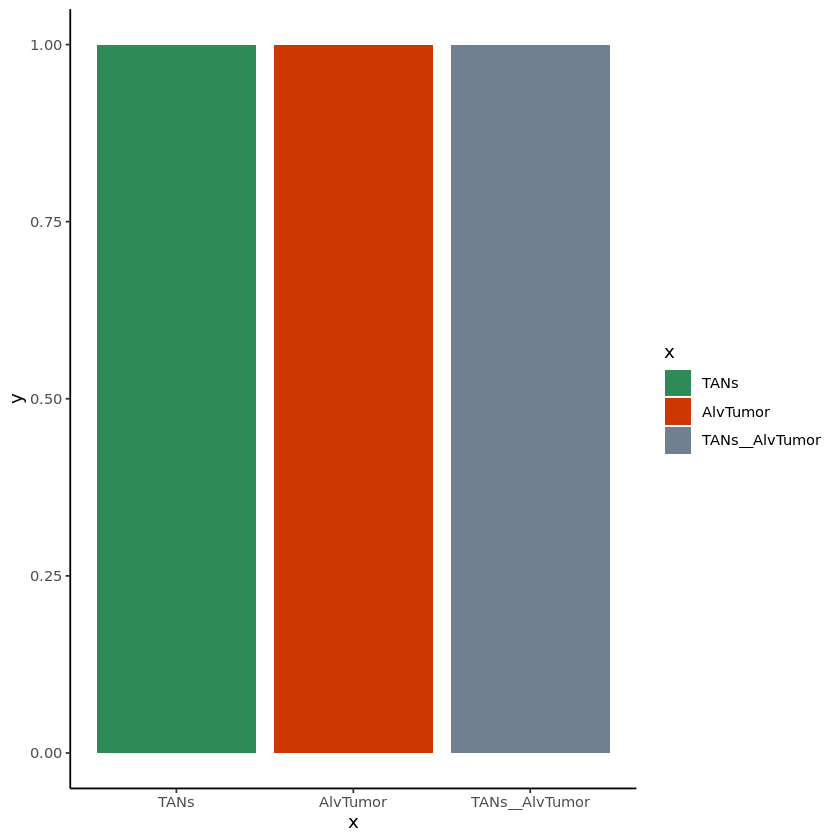

In [167]:
data.frame(x=factor(c(neutrophil_singlets, 'AlvTumor', pics), levels=names(group.colors)), y=1) %>%
    ggplot(aes(x=x, y=y, fill=x)) +
    geom_bar(stat='identity') +
    scale_fill_manual(values = group.colors)

In [168]:
cell_names = as.character(sce@colData$annots)
names(cell_names) = rownames(sce@colData)

In [169]:
good_pics = names(cell_names[cell_names %in% pics])

In [170]:
sin_cl = scdb_mc("merged_neutrophil_epithelial_mc")

In [171]:
numis=500
pic_umis = read_large_umis("neutrophil_clean_pics", cells = good_pics)
ds = .downsamp(pic_umis, numis)
message("Retained ", ncol(ds), " PIC with >", numis, " UMI")

Retained 172 PIC with >500 UMI



In [172]:
genes = setdiff(rownames(pic_umis), bad_genes)

In [173]:
length(genes)

[1] 19824

In [174]:
db_mat = scdb_mat('neutrophil_clean_pics')

In [175]:
genes = intersect(db_mat@genes, rownames(sin_cl@e_gc))
#genes = setdiff(genes, bad_genes)

In [176]:
length(genes)

[1] 16971

In [177]:
mle_res = read.delim("annotations/neutrophil_mle_res.txt", stringsAsFactors = F, row.names=1)

In [178]:
length(good_pics)

[1] 172

In [179]:
alpha = mle_res[good_pics, "alpha"]; names(alpha) = good_pics
epithelial_mc = mle_res[good_pics, "a_mc"]; names(epithelial_mc) = good_pics
immune_mc = mle_res[good_pics, "b_mc"]; names(immune_mc) = good_pics
parser_epithelial = sin_cl@annots[epithelial_mc]; names(parser_epithelial) = good_pics
parser_immune = sin_cl@annots[immune_mc]; names(parser_immune) = good_pics
pic_comb = paste(parser_immune, 
                 ifelse(parser_epithelial %in% tumor_cells, 'AlvTumor', parser_epithelial), 
                 sep = "__") ; names(pic_comb) = good_pics

In [180]:
good_pics[!good_pics %in% rownames(mle_res)]

character(0)

In [181]:
paste(parser_immune[good_pics], parser_epithelial[good_pics]) %>% table

.
TAN2 Alveolar secretory     TAN2 Alveolar spp l    TAN2 Alveolar spp1 h 
                      7                      42                      22 
TAN3 Alveolar secretory     TAN3 Alveolar spp l    TAN3 Alveolar spp1 h 
                     11                      62                      28 

# Flower plots

In [506]:
genedata = read.csv("final_figs/fig4/new_gene_sd/TANs_merged_1012w_genedata.csv", row.names=1)

In [507]:
genedata['Itgb2',]

,Observed_mean,Simulated_mean,Sim_SD,z_scores,full_adj_pval,lfc,epi_imm_ratio,adj_pval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Itgb2,0.3689873,0.1719343,0.04366703,4.512625,0.001893692,0.7862905,0.003578435,0.001893692


In [508]:
genedata = read.csv("final_figs/fig4/new_gene_sd/All_genedata.csv", row.names=1)

In [509]:
genedata['Itgb2',]

,Observed_mean,Simulated_mean,Sim_SD,z_scores,full_adj_pval,lfc,epi_imm_ratio,adj_pval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Itgb2,0.2281005,0.1624559,0.02557637,2.56661,0.2370353,0.3220625,0,0.2370353


In [510]:
genedata = read.csv("final_figs/fig4/new_gene_sd/TAN1_genedata.csv", row.names=1)

In [511]:
genedata['Itgb2',]

,Observed_mean,Simulated_mean,Sim_SD,z_scores,full_adj_pval,lfc,epi_imm_ratio,adj_pval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA


In [512]:
genedata = read.csv("final_figs/fig4/new_gene_sd/TAN2_genedata.csv", row.names=1)

In [513]:
genedata['Itgb2',]

,Observed_mean,Simulated_mean,Sim_SD,z_scores,full_adj_pval,lfc,epi_imm_ratio,adj_pval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Itgb2,0.3357763,0.1148212,0.0632757,3.491943,0.05097083,1.020452,0.003438087,0.05097083


In [514]:
genedata = read.csv("final_figs/fig4/new_gene_sd/TAN3_genedata.csv", row.names=1)

In [515]:
genedata['Itgb2',]

,Observed_mean,Simulated_mean,Sim_SD,z_scores,full_adj_pval,lfc,epi_imm_ratio,adj_pval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Itgb2,0.3959064,0.2112316,0.05931148,3.113645,0.1022224,0.6720796,0.003541332,0.1022224


In [553]:
genedata = read.csv("final_figs/fig4/new_gene_sd/TANs_merged_1012w_genedata.csv", row.names=1)

In [388]:
upgenes = rownames(genedata %>% filter(full_adj_pval < 0.05 & lfc > 0))

In [389]:
create_circle <- function(center = c(0, 0),
                          npoints = 1000,
                          r = 1,
                          start = 0,
                          end = 2) {
  pts <- seq(start * pi, end * pi, length.out = npoints)
  circle_coords <- data.frame(
    x = center[1] + (r * cos(pts)),
    y = center[2] + (r * sin(pts))
  )

  return(circle_coords)
}

In [390]:
x_ys = create_circle(center = c(0, 0), npoints = length(cells_cluster) - 1, r = 10, start = 0, end = 2) %>% head(-1)

In [391]:
cells_cluster_factor = factor(cell_order, levels=cell_order)

In [392]:
p = ggplot(data.frame(x=0, annot=factor(cell_order, levels=cell_order))) +
    geom_point(aes(x=x, y=annot, fill=annot), pch=21, size=10) +
    scale_fill_manual(values = group.colors)

l = get_legend(p)

ggsave(plot=l, filename = "final_figs/fig6/dot_legend.png", dpi=1200)

Saving 6.67 x 6.67 in image


In [393]:
p = ggplot(data.frame(x=0, annot=factor(cells_cluster, levels=cell_order))) +
    geom_point(aes(x=x, y=annot, fill=annot), pch=21, size=10) +
    scale_fill_manual(values = group.colors)

l = get_legend(p)

ggsave(plot=l, filename = "final_figs/fig6/dot_legend_tme.png", dpi=1200)

Saving 6.67 x 6.67 in image


In [394]:
.get_freq <- function(liana_res){
    liana_res %>%
        group_by(source, target) %>%
        summarise(freq = n(), .groups = 'keep') %>%
        pivot_wider(id_cols = source,
                    names_from = target,
                    values_from = freq,
                    values_fill = 0) %>%
        arrange(source) %>%
        ungroup() %>%
        as.data.frame() %>%
        column_to_rownames('source') %>%
        as.matrix()
}

In [561]:
create_arrow_plot = function(partners, df_name, arrow_df, dot_df, dot_dict, plot_type, basedir="final_figs/fig6/arrows/", 
                             to_save=F){
    
    arrow_df$x1 = dot_dict[as.character(arrow_df$source), 'x']
    arrow_df$y1 = dot_dict[as.character(arrow_df$source), 'y']
    arrow_df$x2 = dot_dict[as.character(arrow_df$target), 'x']
    arrow_df$y2 = dot_dict[as.character(arrow_df$target), 'y']
    arrow_df$distance = sqrt((arrow_df$x2 - arrow_df$x1) ** 2 + (arrow_df$y2 - arrow_df$y1) ** 2)
    arrow_df$x1_fixed = arrow_df$x1 + (arrow_df$x2 - arrow_df$x1) * 1.25 / arrow_df$distance
    arrow_df$x2_fixed = arrow_df$x2 + (arrow_df$x1 - arrow_df$x2) * 1.25 / arrow_df$distance 
    arrow_df$y1_fixed = arrow_df$y1 + (arrow_df$y2 - arrow_df$y1) * 1.25 / arrow_df$distance 
    arrow_df$y2_fixed = arrow_df$y2 + (arrow_df$y1 - arrow_df$y2) * 1.25 / arrow_df$distance 

    if (plot_type == "singlet"){
        arrow_df$color = ifelse(arrow_df$source %in% partners,
                                group.colors[arrow_df$source],
                                group.colors[arrow_df$target])
    }else if (plot_type == "pic"){
        arrow_df$color = 'slategray'
    } else if (plot_type == "upnew"){
        arrow_df$color = type_colors[arrow_df$interaction_type]
    }

    p = ggplot(dot_df, aes(x=x, y=y, fill=cell)) +
            scale_size_identity() +
            scale_color_identity() +
            #scale_color_gradient(low='brown1', high='brown4', limits=c(1,500)) +
            geom_point(pch=21, size=10, show.legend = F) +
            scale_fill_manual(values = group.colors) +
            #labs(title = df_name) +
            theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
                  axis.ticks = element_blank(), 
                  axis.line = element_blank(), 
                  axis.title = element_blank(), 
                  axis.text = element_blank())
    
    if (plot_type == "upnew"){
        p = p + 
            geom_curve(curvature = 0.2,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, 
                       #size=log1p(count), 
                       color=type_colors["De novo"], fill=NA),
                       data = arrow_df %>% filter(interaction_type == 'De novo'), 
                       arrow = arrow(length = unit(0.1, "in"))) + 
            geom_curve(curvature = 0,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, 
                       #size=log1p(count), 
                       color=type_colors["Both"], fill=NA),
                       data = arrow_df %>% filter(interaction_type == 'Both'), 
                       arrow = arrow(length = unit(0.1, "in"))) + 
            geom_curve(curvature = -0.2,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, 
                       #size=log1p(count), 
                       color=type_colors["Upregulated"], fill=NA),
                       data = arrow_df %>% filter(interaction_type == 'Upregulated'), 
                       arrow = arrow(length = unit(0.1, "in"))) +
            geom_label(aes(x=(x1 + x2) / 2, y = (y1 + y2) / 2, label=count), inherit.aes=F,
                      data = arrow_df %>% group_by(x1, x2, y1, y2) %>% summarise(count=sum(count)))
    } else {
        p = p + 
            geom_curve(curvature = 0.2,
                       aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, yend = y2_fixed, 
                       size=log1p(count), color=color, fill=NA),
                       data = arrow_df, 
                       arrow = arrow(length = unit(0.3, "in")))
    }
    
    if (to_save){
        ggsave(plot = p, filename = paste0(basedir, df_name, ".png"), dpi=1200)
        ggsave(plot = p, filename = paste0(basedir, df_name, ".emf"), width=30, height=30, unit="mm", 
               device = {function(filename, ...) devEMF::emf(file = filename, family = 'Arial')})
    }
    return(p)
}

In [562]:
arrow_plots = function(pic, liana_carcinoma, other_pops=cells_cluster, to_save=T, basedir="final_figs/fig6/arrows/", 
                       max_rank=0.05){
    
    # General preperations
    if(!dir.exists(basedir)){dir.create(basedir)}
    partners = str_split(pic, "__") %>% unlist
    other_pops = setdiff(other_pops, partners)
    
    x_ys = create_circle(center = c(0, 0),
                         npoints = length(other_pops) + 1, 
                         r = 10, 
                         start = 0, 
                         end = 2) %>%
        head(-1)
    base_dot_df = cbind(x_ys, cell=rev(other_pops))
    
    # Build PIC dotplot    
    pic_dot_df = base_dot_df %>% 
        rbind(data.frame(x=c(-0.5, 0.5), y=c(0, 0), cell=partners))
    pic_dot_dict = pic_dot_df %>% 
        head(-2) %>% 
        rbind(data.frame(x=0, y=0, cell=pic)) %>% 
        column_to_rownames('cell')
    
    # Build singlets dotplot
    singlet_dot_df = base_dot_df %>%
        rbind(data.frame(x=c(-3, 3), y=c(0, 0), cell=partners))
    singlet_dot_dict = singlet_dot_df %>%
        column_to_rownames('cell')
    
    # Outgoing DFs    
    out_counts_df = liana_carcinoma %>% 
        filter(source %in% c(pic, partners) & target %in% other_pops & cellphonedb.pvalue < max_rank) %>%
        group_by(target, ligand.complex, receptor.complex) %>%
        mutate(is_up = ifelse(source == pic & any(ligand.complex %in% upgenes), 1, 0),
               is_denovo = ifelse(source == pic & n() == 1, 2, 0)) %>%
        mutate(interaction_type = c('Normal', 'Upregulated', 'De novo', 'Both')[1 + is_up + is_denovo])
    if (to_save){write.csv(out_counts_df, paste0(basedir, "out_interactions.csv"), row.names=F)}

    out_singlet_arrow_df = out_counts_df %>%
        filter(source %in% partners) %>%
        group_by(source, target) %>%
        summarise(count=n())
    out_pic_arrow_df = out_counts_df %>%
        filter(source == pic) %>%
        group_by(source, target) %>%
        summarise(count=n())
    out_upnew_arrow_df = out_counts_df %>%
        filter(source == pic & interaction_type != "Normal") %>%
        group_by(source, target, interaction_type) %>%
        summarise(count=n())

        # Incoming DFs    
    in_counts_df = liana_carcinoma %>% 
        filter(target %in% c(pic, partners) & source %in% other_pops & cellphonedb.pvalue < max_rank) %>%
        group_by(source, ligand.complex, receptor.complex) %>%
        mutate(is_up = ifelse(target == pic & any(unlist(str_split(receptor.complex, "_")) %in% upgenes), 1, 0),
               is_denovo = ifelse(target == pic & n() == 1, 2, 0)) %>%
        mutate(interaction_type = c('Normal', 'Upregulated', 'De novo', 'Both')[1 + is_up + is_denovo])
    if (to_save){write.csv(in_counts_df, paste0(basedir, "in_interactions.csv"), row.names=F)}
    in_singlet_arrow_df = in_counts_df %>%
        filter(target %in% partners) %>%
        group_by(source, target) %>%
        summarise(count=n())
    in_pic_arrow_df = in_counts_df %>%
        filter(target == pic) %>%
        group_by(source, target) %>%
        summarise(count=n())
    in_upnew_arrow_df = in_counts_df %>%
        filter(target == pic & interaction_type != "Normal") %>%
        group_by(source, target, interaction_type) %>%
        summarise(count=n())
    
    arrow_dfs = list(out_singlet=out_singlet_arrow_df,
                     out_pic=out_pic_arrow_df,
                     out_upnew=out_upnew_arrow_df,
                     in_singlet=in_singlet_arrow_df,
                     in_pic=in_pic_arrow_df,
                     in_upnew=in_upnew_arrow_df)
        
    arrow_plots = lapply(names(arrow_dfs), function(df_name){
        arrow_df = arrow_dfs[[df_name]]
        plot_type = unlist(str_split(df_name, "_"))[2]
        if (plot_type == "singlet"){
            dot_df = singlet_dot_df
            dot_dict = singlet_dot_dict
        } else {
            dot_df = pic_dot_df
            dot_dict = pic_dot_dict
        }
        p = create_arrow_plot(partners, df_name, arrow_df, dot_df, dot_dict, plot_type, basedir=basedir, to_save=to_save)
        return(p)
    })
    
    return(arrow_plots)
}

In [563]:
ap_plots = arrow_plots("TANs__AlvTumor", liana_carcinoma, other_pops = cells_cluster, max_rank = 0.05)

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'source', 'target'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'source', 'target'. You can override using
the `.groups` argument.
Warning message in geom_curve(curvature = 0.2, aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, :
“Ignoring unknown aesthetics: fill”
Saving 6.67 x 6.67 in image
Warning message in geom_curve(curvature = 0.2, aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, :
“Ignoring unknown aesthetics: fill”
Saving 6.67 x 6.67 in image
Warning message in geom_curve(curvature = 0.2, aes(x = x1_fixed, y = y1_fixed, xend = x2_fixed, :


In [280]:
pic = "TANs__AlvTumor"
other_pops = cells_cluster
max_rank = 0.05
partners = str_split(pic, "__") %>% unlist

other_pops = setdiff(other_pops, partners)
out_counts_df = liana_carcinoma %>% 
    filter(source %in% c(pic, partners) & target %in% other_pops & cellphonedb.pvalue < max_rank) %>%
    group_by(target, ligand.complex, receptor.complex) %>%
    mutate(is_up = ifelse(source == pic & any(ligand.complex %in% upgenes), 1, 0),
           is_denovo = ifelse(source == pic & n() == 1, 2, 0)) %>%
    mutate(interaction_type = c('Normal', 'Upregulated', 'De novo', 'Both')[1 + is_up + is_denovo])


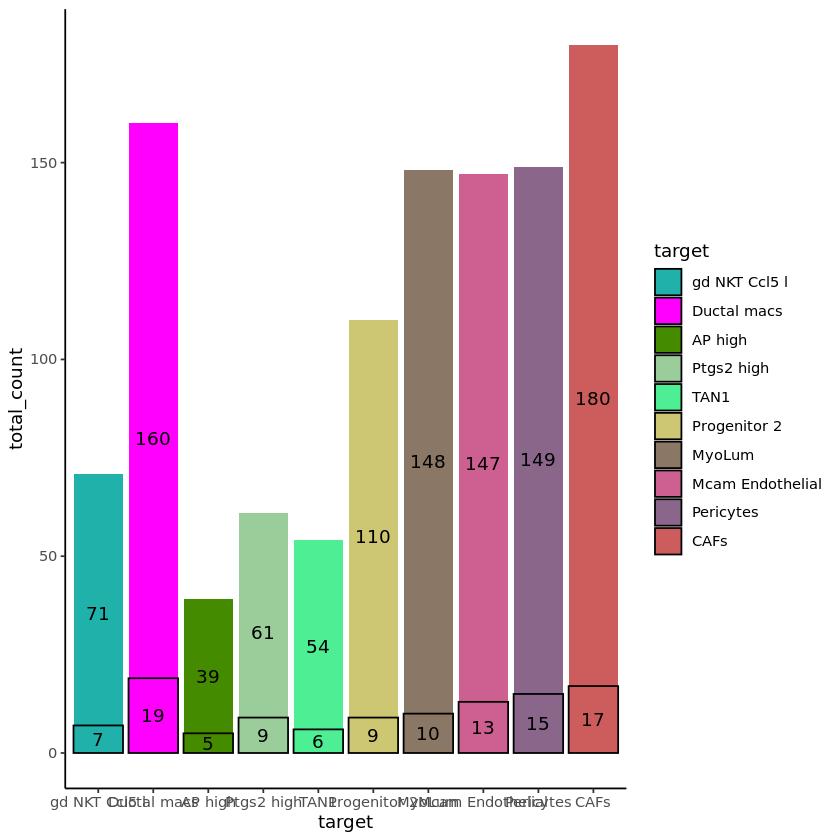

In [294]:
out_counts_df %>%
    filter(source == pic) %>%
    group_by(target) %>%
    summarise(total_count = n(), induced = sum(interaction_type != "Normal"), pct=induced / total_count) %>%
    ggplot(aes(x=target, y=total_count, fill=target)) +
    geom_bar(stat='identity') +
    geom_bar(stat='identity', aes(y=induced), color='black') +
    geom_text(aes(y = total_count / 2, label=total_count)) +
    geom_text(aes(y = induced / 2, label=induced)) +
    scale_fill_manual(values = group.colors)

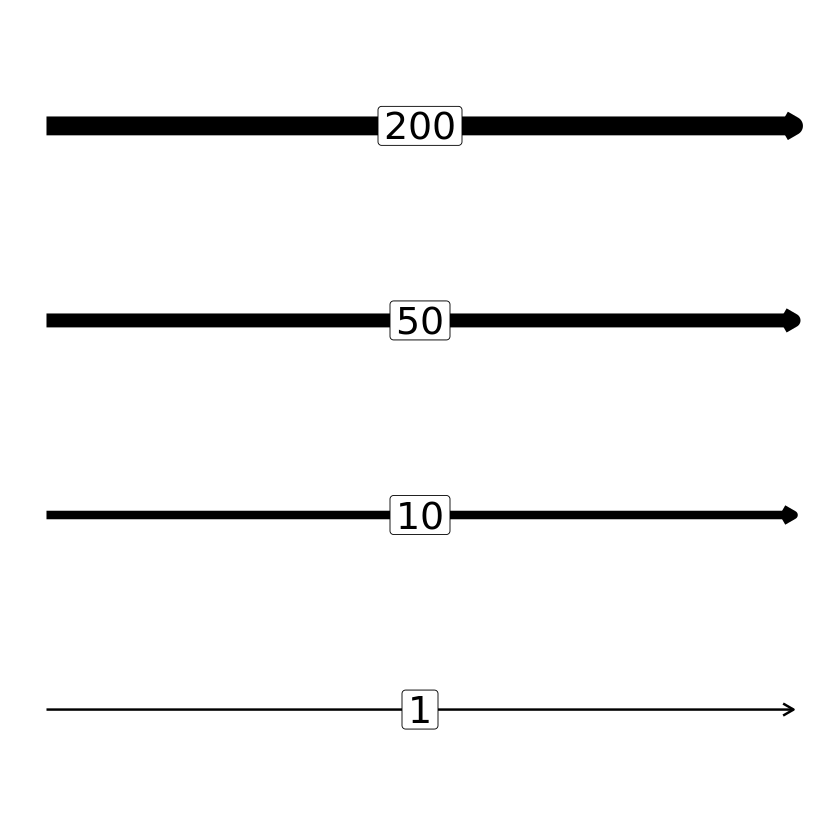

In [246]:
data.frame(x=rep(1, 4), y=1:4, size=log1p(c(1, 10, 50, 200)), xend=rep(3, 4), yend=1:4, label=c(1, 10, 50, 200)) %>%
    ggplot(aes(x = x, xend = xend, y=y, yend = yend, size=size, label=label)) +
    geom_segment(arrow = arrow(length = unit(0.1, "in"))) +
    scale_size_identity() +  
    scale_y_discrete() +
    geom_label(x=2, size=8) +
    theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
          axis.ticks = element_blank(), 
          axis.line = element_blank(), 
          axis.title = element_blank(), 
          axis.text = element_blank())
ggsave("final_figs/fig6/arrows/arrow_legend.png", dpi=1200, width = 2, height=3)

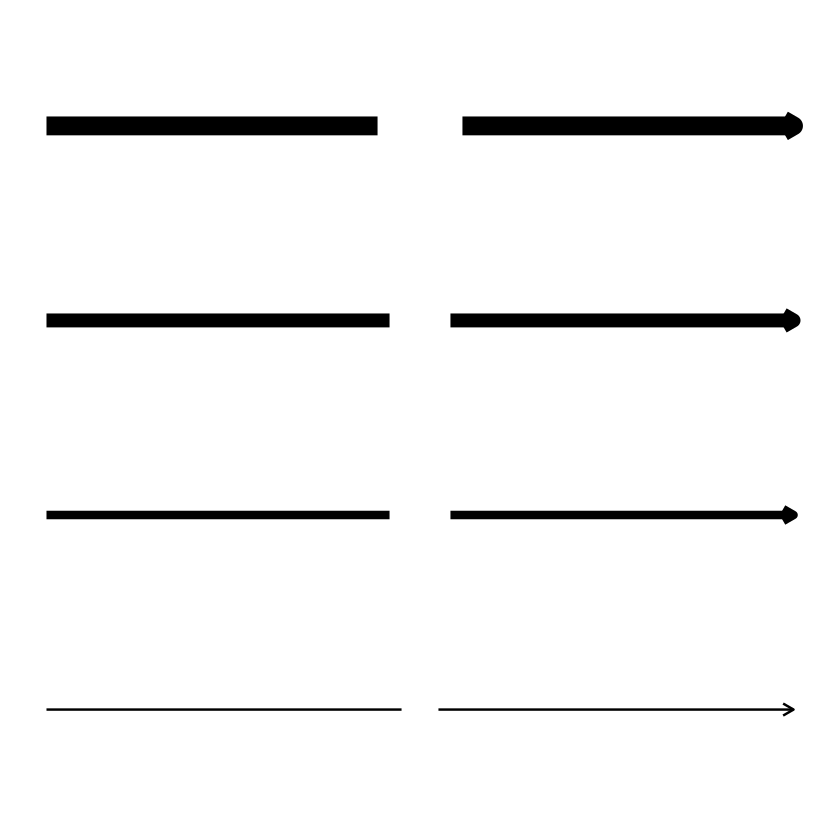

In [341]:
data.frame(x=rep(1, 4), y=1:4, size=log1p(c(1, 10, 50, 200)), xend=rep(3, 4), yend=1:4, label=c(1, 10, 50, 200)) %>%
    ggplot(aes(x = x, xend = xend, y=y, yend = yend, size=size, label=label)) +
    geom_segment(arrow = arrow(length = unit(0.1, "in"))) +
    scale_size_identity() +  
    scale_y_discrete() +
    geom_label(x=2, size=8, color='white') +
    theme(plot.title = element_text(size=16, face='bold', hjust=0.5),
          axis.ticks = element_blank(), 
          axis.line = element_blank(), 
          axis.title = element_blank(), 
          axis.text = element_blank())
ggsave("final_figs/fig6/arrows/arrow_legend_blank.png", dpi=1200, width = 2, height=3)

# Dotplots

In [247]:
mc_kinetics = scdb_mc("kinetics_mc")

In [248]:
mc_neutrophil = scdb_mc("neutrophil_mc")

In [249]:
all_mat = t(mat@mat)
all_mat = all_mat[colnames(sce),]
norm_mat = log1p(1e4 * all_mat / rowSums(all_mat))

In [250]:
norm_mat_df = data.frame(norm_mat, annot=sce$annots) %>% 
    melt(id.vars = 'annot', variable.name = 'Gene', value.name = 'LogNormExpr')

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.2 GiB”


In [253]:
pct_expr = norm_mat_df %>%
    group_by(annot, Gene) %>%
    summarise(pct_expression = sum(LogNormExpr > 0) / n()) %>%
    dcast(annot ~ Gene)

`summarise()` has grouped output by 'annot'. You can override using the
`.groups` argument.
Using pct_expression as value column: use value.var to override.



In [254]:
pct_expr = pct_expr %>% column_to_rownames('annot')

In [255]:
pct_expr['TANs__AlvTumor',c('Cxcl2')] %>% unlist %>% mean

[1] 0.494186

In [417]:
-log10(0.001) + 1

[1] 4

In [436]:
dotplot_plot = function(other, pic='TANs__AlvTumor', direction='OUT', basedir="final_figs/fig6/dotplots_agg/",
                        min_fraction=0.1, only_induced=T, sig_thresh=0.05, suffix=""){
    partners = str_split(pic, "__") %>% unlist
    if (direction == 'IN'){
        is_in = T
    } else if (direction == 'OUT'){
        is_in = F
    } else {
        message("WARNING - NOT A VALID DIRECTION")
    }
    is_in_vector = rep(is_in, nrow(liana_carcinoma))

    focus_liana = liana_carcinoma %>% 
        mutate(focus_cell = ifelse(is_in_vector, as.character(target), as.character(source)),
               other_cell = ifelse(is_in_vector, as.character(source), as.character(target)),
               focus_gene = ifelse(is_in_vector, receptor.complex, ligand.complex),
               other_gene = ifelse(is_in_vector, ligand.complex, receptor.complex)) %>%
        filter(focus_cell %in% c(pic, partners) & other_cell %in% other) %>% 
        mutate(lr = paste(ligand.complex, receptor.complex, sep=' -> ')) %>%
        group_by(lr) %>%
        mutate(min_pval = min(aggregate_rank)) %>%
        filter(min_pval < sig_thresh)

    upnew_interactions = focus_liana %>%
        filter(aggregate_rank < sig_thresh) %>%
        group_by(lr) %>%
        mutate(is_up = ifelse(focus_cell == pic & any(unlist(str_split(focus_gene, "_")) %in% upgenes), 2, 0),
               is_denovo = ifelse(focus_cell == pic & n() == 1, 1, 0)) %>%
        filter(focus_cell == pic) %>%
        mutate(interaction_type = factor(names(type_colors)[1 + is_up + is_denovo], levels=names(type_colors))) %>%
        filter(pct_expr[pic, unlist(str_split(focus_gene, "_"))] %>% unlist %>% mean > min_fraction) %>%
        column_to_rownames('lr')
    
    if (only_induced){
        upnew_interactions = upnew_interactions %>% filter(interaction_type != 'Normal')
    }
    
    if (nrow(upnew_interactions) == 0){
        message("couldn't find interactions with ", sig_thresh)
        return()
    }
    
    upnew_full_tbl = focus_liana %>%
        filter(lr %in% rownames(upnew_interactions)) %>%
        mutate(focus_cell = factor(focus_cell, levels = c(partners, pic)),
               interaction_type = upnew_interactions[lr, 'interaction_type'],
               aggregate_rank = ifelse(aggregate_rank < 0.001, 0.001, aggregate_rank))

    p = ggplot(upnew_full_tbl, aes(x=lr, y=focus_cell, size=-log10(aggregate_rank))) +
        geom_point(color=group.colors[other]) +
        geom_tile(inherit.aes = F, aes(x=lr, y=0, fill=interaction_type), height=0.25) +
        labs(title = paste(other, direction)) +
        scale_y_discrete(drop=F) +
        scale_size_continuous(limits=c(0,3), range = c(1, 8)) +
        facet_grid(~ interaction_type, space = 'free_x', scales='free_x') +
        scale_fill_manual(values = type_colors) +
        theme(axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5, size=6), axis.text.y = element_text(size=6),
              axis.title.x = element_blank(), axis.title.y = element_blank(), plot.title = element_text(size=12, hjust=0.5))
    
    upnew_full_tbl[c('lr','interaction_type')] %>% 
        unique %>% 
        arrange(interaction_type, lr) %>% 
        as.data.frame %>%
        select(lr) %>%
        unlist %>%
        write_lines(file = paste0(basedir, other, "_", direction, suffix, "_names.txt"))

    l = get_legend(p)
    p = plot_grid(p + theme(legend.position="none"))

    ggsave(plot=p, filename=paste0(basedir, other, "_", direction, suffix, ".png"), dpi=1200, height=3, width=8)
    ggsave(plot=l, filename=paste0(basedir, other, "_", direction, suffix, "_legend.png"), dpi=1200, height=8, 
           width=3)
}

In [437]:
for (pop in c('Mcam Endothelial', 'Ductal macs', 'Pericytes', 'CAFs', 'TANs', 'Endothelial')){
    message(pop, "...")
    for (direction in c('IN', 'OUT')){
        message("\t", direction)
        dotplot_plot(pop, direction = direction)
        dotplot_plot(pop, only_induced=F, direction = direction, suffix="_all")
        dotplot_plot(pop, sig_thresh=0.01, direction = direction, suffix="_01")
        dotplot_plot(pop, sig_thresh=0.01, only_induced=F, direction = direction, suffix="_01_all")
    }
}

Mcam Endothelial...

	IN

	OUT

Ductal macs...

	IN

couldn't find interactions with 0.01

	OUT

couldn't find interactions with 0.01

Pericytes...

	IN

couldn't find interactions with 0.01

	OUT

CAFs...

	IN

	OUT

couldn't find interactions with 0.01

TANs...

	IN

	OUT

Endothelial...

	IN

	OUT



In [430]:
for (pop in c('CAFs')){
    message(pop, "...")
    for (direction in c('IN')){
        message("\t", direction)
        dotplot_plot(pop, sig_thresh=0.001, direction = direction, suffix="_001")
        dotplot_plot(pop, sig_thresh=0.001, only_induced=F, direction = direction, suffix="_001_all")
    }
}

CAFs...

	IN

couldn't find interactions with 0.001



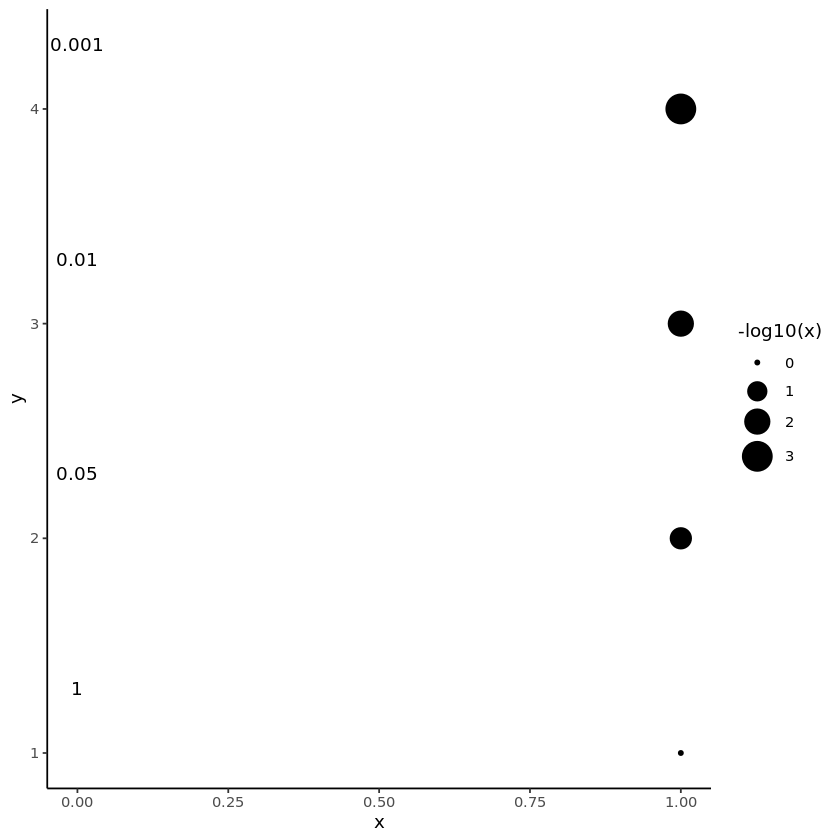

In [435]:
data.frame(x=c(1, 0.05, 0.01, 0.001), y=1:4) %>%
    ggplot(aes(x=1, y=y, size=-log10(x))) +
    geom_point() +
    geom_text(aes(x=0,y=y + 0.3,label=x), inherit.aes = F) +
    scale_size_continuous(limits=c(0,3), range = c(1, 8))
ggsave("final_figs/fig6/dotplot_legend.png", dpi=1200, height=3, width=5)

In [386]:
p = c('Normal', 'De novo', 'Upregulated', 'Both') %>%
data.frame(x=factor(., levels=.)) %>%
    ggplot(aes(x=x, y=1, fill=x)) +
    geom_bar(stat='identity') +
    scale_fill_manual(values = type_colors) 
l = get_legend(p)
ggsave("final_figs/fig6/dotplot_line_legend.png", l, dpi=1200)

Saving 6.67 x 6.67 in image


# Gene barplots

In [353]:
mc_kinetics = scdb_mc("kinetics_mc")

In [354]:
mc_neutrophil = scdb_mc("neutrophil_mc")

In [355]:
all_mat = t(mat@mat)
all_mat = all_mat[colnames(sce),]
norm_mat = log1p(1e4 * all_mat / rowSums(all_mat))

In [356]:
norm_mat_df = data.frame(norm_mat, annot=sce$annots) %>% 
    melt(id.vars = 'annot', variable.name = 'Gene', value.name = 'LogNormExpr')

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.2 GiB”


In [357]:
plot_bar_per_pop = function(gene, pops){
    if (grepl("_", gene)){
        plot_df = data.frame(LogNormExpr=rowSums(norm_mat[,str_split(gene, "_") %>% unlist]), 
                             annot=factor(sce$annots, levels=pops))
    } else {
        plot_df = data.frame(LogNormExpr=norm_mat[,gene], annot=factor(sce$annots, levels=pops))
    }
    plot_df = plot_df %>% filter(annot %in% pops)
    ggplot(plot_df, aes(x=annot, y=LogNormExpr, fill=annot)) +
        stat_summary(fun = mean, geom = 'bar', color='black', show.legend=F) +
        stat_summary(fun.data = mean_se, geom='errorbar', width=0.2) +
        scale_fill_manual(values=group.colors) +
        geom_hline(yintercept = 0) +
        labs(title = gene) +
        theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(),
              axis.line.x = element_blank(), axis.text.y = element_text(size=8), axis.title.y = element_blank(), 
              plot.title = element_text(hjust=0.5, size=12))
}


In [365]:
barplot_interactions = function(other_name, others, pic='TANs__AlvTumor', direction='OUT', 
                                basedir="final_figs/fig6/barplots/", only_induced=T){
    partners = str_split(pic, "__") %>% unlist
    if (direction == 'IN'){
        is_in = T
    } else if (direction == 'OUT'){
        is_in = F
    } else {
        message("WARNING - NOT A VALID DIRECTION")
    }
    is_in_vector = rep(is_in, nrow(liana_carcinoma))

    upnew_interactions = liana_carcinoma %>% 
        mutate(focus_cell = ifelse(is_in_vector, as.character(target), as.character(source)),
               other_cell = ifelse(is_in_vector, as.character(source), as.character(target)),
               focus_gene = ifelse(is_in_vector, receptor.complex, ligand.complex),
               other_gene = ifelse(is_in_vector, ligand.complex, receptor.complex)) %>%
        filter(focus_cell %in% c(pic, partners) & other_cell %in% others & cellphonedb.pvalue < 0.05) %>%
            group_by(other_cell, ligand.complex, receptor.complex) %>%
            mutate(type=ifelse(focus_cell == pic, 
                               ifelse(any(unlist(str_split(focus_gene, "_")) %in% upgenes), "Upregulated",
                                      ifelse(n() == 1, "De novo", "Normal")),
                               NA))
    if (only_induced){
        upnew_interactions = upnew_interactions %>% filter(type %in% c('De novo', 'Upregulated'))
    } 
    
    dirname = paste0(basedir, other_name, "_", direction)
    if (!dir.exists(dirname)) {dir.create(dirname)}
    for (gene_a in upnew_interactions$focus_gene %>% unique){
        gene_dir = paste0(dirname, "/", gene_a, "/")
        if (!dir.exists(gene_dir)) {dir.create(gene_dir)}
        p = plot_bar_per_pop(gene_a, c(partners, pic))
        ggsave(paste0(gene_dir, gene_a, ".png"), dpi=1200, height=3, width=1.6)
            ggsave(paste0(gene_dir, gene_a, "_noaxis.png"), plot = p + theme(axis.text.y = element_blank()),
                   dpi=1200, height=3, width=1.6)
        
        other_genes = upnew_interactions[upnew_interactions$focus_gene == gene_a,'other_gene'] %>% unlist %>% unique
        for (gene_b in other_genes){
            p = plot_bar_per_pop(gene_b, others)
            ggsave(paste0(gene_dir, gene_b, ".png"), dpi=1200, height=3, width=0.1 + (0.5 * length(others)))
            ggsave(paste0(gene_dir, gene_b, "_noaxis.png"), plot = p + theme(axis.text.y = element_blank()),
                   dpi=1200, height=3, width=0.1 + (0.5 * length(others)))
        }
    }
}

In [366]:
barplot_interactions("final", c('Ductal macs', 'CAFs', 'Mcam Endothelial', 'Pericytes'))

In [367]:
barplot_interactions("final", c('Ductal macs', 'CAFs', 'Mcam Endothelial', 'Pericytes'), direction="IN", only_induced=F)

In [383]:
p = c(partners, pic, 'Ductal macs', 'CAFs', 'Mcam Endothelial', 'Pericytes') %>%
data.frame(x=factor(., levels=.)) %>%
    ggplot(aes(x=x, y=1, fill=x)) +
    geom_bar(stat='identity') +
    scale_fill_manual(values = group.colors) 
l = get_legend(p)
        for (gene_b in other_genes){
            p = plot_bar_per_pop(gene_b, others)
            ggsave(paste0(gene_dir, gene_b, ".png"), dpi=1200, height=3, width=0.1 + (0.5 * length(others)))
            ggsave(paste0(gene_dir, gene_b, "_noaxis.png"), plot = p + theme(axis.text.y = element_blank()),
                   dpi=1200, height=3, width=0.1 + (0.5 * length(others)))
        }
ggsave("final_figs/fig6/barplots/barplot_legend.png", l, dpi=1200)

Saving 6.67 x 6.67 in image


In [441]:
gene_dir = "final_figs/fig6/barplots/final_OUT/Vegfa/"
others = c('Ductal macs', 'CAFs', 'Mcam Endothelial', 'Pericytes')
for (gene in c("Flt1", "Kdr")){
    p = plot_bar_per_pop(gene, others)
    ggsave(paste0(gene_dir, gene, ".png"), dpi=1200, height=3, width=0.1 + (0.5 * length(others)))
    ggsave(paste0(gene_dir, gene, "_noaxis.png"), plot = p + theme(axis.text.y = element_blank()),
           dpi=1200, height=3, width=0.1 + (0.5 * length(others)))
}

In [ ]:
barplot_interactions("Perivasc", perivasc)

In [ ]:
barplot_interactions("Perivasc", perivasc, direction="IN")

In [ ]:
barplot_interactions("CA_cells", c('Ductal macs', 'CAFs'))

In [ ]:
barplot_interactions("CA_cells", c('Ductal macs', 'CAFs'), direction="IN")

In [ ]:
barplot_interactions("MonMacs", monmacs)

In [ ]:
barplot_interactions("MonMacs", monmacs, direction="IN")

In [ ]:
barplot_interactions("CA_cells_expanded", c('Ductal macs', 'CAFs', 'Mcam Endothelial', 'Pericytes', 'MyoLum'))

In [ ]:
barplot_interactions("CA_cells_expanded", c('Ductal macs', 'CAFs', 'Mcam Endothelial', 'Pericytes', 'MyoLum'), direction="IN")

In [ ]:
plot_bars = function(genes, pops, expr_df){
    genes = genes
    plot_df = expr_df %>% filter(annot %in% pops) %>% filter(Gene %in% genes)
    ggplot(plot_df, aes(x=annot, y=LogNormExpr, fill=annot)) +
        stat_summary(fun = mean, geom = 'bar', color='black', show.legend=F) +
        stat_summary(fun.data = mean_se, geom='errorbar', width=0.2) +
        scale_fill_manual(values=group.colors) +
        facet_grid(~ Gene) +
        geom_hline(yintercept = 0) +
        theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
              strip.background = element_blank(), strip.text = element_text(size = 16),
              axis.title.y = element_blank(), axis.line.x = element_blank())
}


In [ ]:
barplot_interactions = function(others, pic='TANs__AlvTumor', direction='OUT'){
    partners = str_split(pic, "__") %>% unlist
    if (direction == 'IN'){
        is_in = T
    } else if (direction == 'OUT'){
        is_in = F
    } else {
        message("WARNING - NOT A VALID DIRECTION")
    }
    is_in_vector = rep(is_in, nrow(liana_carcinoma))

    upnew_interactions = liana_carcinoma %>% 
        mutate(focus_cell = ifelse(is_in_vector, as.character(target), as.character(source)),
               other_cell = ifelse(is_in_vector, as.character(source), as.character(target)),
               focus_gene = ifelse(is_in_vector, receptor.complex, ligand.complex),
               other_gene = ifelse(is_in_vector, ligand.complex, receptor.complex)) %>%
        filter(focus_cell %in% c(pic, partners) & other_cell %in% others & cellphonedb.pvalue < 0.05) %>%
            group_by(other_cell, ligand.complex, receptor.complex) %>%
            mutate(type=ifelse(focus_cell == pic, 
                               ifelse(n() == 1, "De novo", 
                                      ifelse(any(unlist(str_split(focus_gene, "_")) %in% upgenes), 
                                              "Upregulated", "Normal")),
                               NA)) %>%
        filter(type %in% c('De novo', 'Upregulated'))

    gene_plots = lapply(upnew_interactions$focus_gene %>% unique, function(gene){
        pic_gene_plot = plot_bars(gene, c(partners, pic), norm_mat_df %>% filter(annot %in% c(partners, pic)))
        other_genes = upnew_interactions[upnew_interactions$focus_gene == gene,'other_gene'] %>% unlist %>% unique
        singlet_gene_plot = plot_bars(other_genes, others, norm_mat_df %>% filter(annot %in% others)) + 
            theme(strip.text=element_text(angle=90))        
        if (is_in){
            ggarrange(singlet_gene_plot, pic_gene_plot, ncol = 1, nrow=2)
        } else {
            ggarrange(pic_gene_plot, singlet_gene_plot, ncol = 1, nrow=2)
        }
    })

    return(ggarrange(plotlist = gene_plots, nrow = 1))
}

In [ ]:
    partners = str_split(pic, "__") %>% unlist
    if (direction == 'IN'){
        is_in = T
    } else if (direction == 'OUT'){
        is_in = F
    } else {
        message("WARNING - NOT A VALID DIRECTION")
    }
    is_in_vector = rep(is_in, nrow(liana_carcinoma))

    upnew_interactions = liana_carcinoma %>% 
        mutate(focus_cell = ifelse(is_in_vector, as.character(target), as.character(source)),
               other_cell = ifelse(is_in_vector, as.character(source), as.character(target)),
               focus_gene = ifelse(is_in_vector, receptor.complex, ligand.complex),
               other_gene = ifelse(is_in_vector, ligand.complex, receptor.complex)) %>%
        filter(focus_cell %in% c(pic, partners) & other_cell %in% others & cellphonedb.pvalue < 0.05) %>%
            group_by(other_cell, ligand.complex, receptor.complex) %>%
            mutate(type=ifelse(focus_cell == pic, 
                               ifelse(n() == 1, "De novo", 
                                      ifelse(any(unlist(str_split(focus_gene, "_")) %in% upgenes), 
                                              "Upregulated", "Normal")),
                               NA)) %>%
        filter(type %in% c('De novo', 'Upregulated'))

    gene_plots = lapply(upnew_interactions$focus_gene %>% unique, function(gene){
        pic_gene_plot = plot_bars(gene, c(partners, pic), norm_mat_df)
        other_genes = upnew_interactions[upnew_interactions$focus_gene == gene,'other_gene'] %>% unlist %>% unique
        singlet_gene_plot = plot_bars(other_genes, others, norm_mat_df) + theme(strip.text=element_text(angle=90))        
        if (is_in){
            ggarrange(singlet_gene_plot, pic_gene_plot, ncol = 1, nrow=2)
        } else {
            ggarrange(pic_gene_plot, singlet_gene_plot, ncol = 1, nrow=2)
        }
    })


In [ ]:
barplot_interactions(perivasc)

In [ ]:
barplot_interactions("CAFs")

In [ ]:
barplot_interactions("CAFs", direction = 'IN')

In [ ]:
barplot_interactions("Ductal macs")

In [ ]:
barplot_interactions("Ductal macs", direction = 'IN')

In [ ]:
barplot_interactions(c("Monocytes", "MonMacs", "Ductal macs"))

In [ ]:
barplot_interactions(c("Monocytes", "MonMacs", "Ductal macs"), direction = 'IN')

In [ ]:
singlet_pics = c('TANs', 'AlvTumor', 'TANs__AlvTumor')

In [ ]:
plot_bars(c('Sirpa', 'Cd44', 'S1pr1'), others, norm_mat_df)

In [ ]:
cell_order

In [ ]:
others = c('Endothelial', 'Mcam Endothelial', 'Pericytes', 'CAFs', 'Ductal macs')

In [ ]:
partners = str_split(pic, "__") %>% unlist
if (direction == 'IN'){
    is_in = T
} else if (direction == 'OUT'){
    is_in = F
} else {
    message("WARNING - NOT A VALID DIRECTION")
}
is_in_vector = rep(is_in, nrow(liana_carcinoma))

upnew_interactions = liana_carcinoma %>% 
    mutate(focus_cell = ifelse(is_in_vector, as.character(target), as.character(source)),
           other_cell = ifelse(is_in_vector, as.character(source), as.character(target)),
           focus_gene = ifelse(is_in_vector, receptor.complex, ligand.complex),
           other_gene = ifelse(is_in_vector, ligand.complex, receptor.complex)) %>%
    filter(focus_cell %in% c(pic, partners) & other_cell %in% others & cellphonedb.pvalue < 0.05) %>%
        group_by(other_cell, ligand.complex, receptor.complex) %>%
        mutate(type=ifelse(focus_cell == pic, 
                           ifelse(n() == 1, "De novo", 
                                  ifelse(any(unlist(str_split(focus_gene, "_")) %in% upgenes), 
                                          "Upregulated", "Normal")),
                           NA)) %>%
    filter(type %in% c('De novo', 'Upregulated'))

In [ ]:
focus_genes = unique(upnew_interactions$ligand.complex)

In [ ]:
pic_gene_plot = plot_obs_exp(gene, genedata)
singlet_df = upnew_interactions %>% 
    filter(focus_gene == gene) %>%
    mutate(mean_expr = mean(gene_means[unlist(str_split(other_gene, "_"))]))
singlet_gene_plot = ggplot(singlet_df, aes(x=other_gene, y=mean_expr)) +
    geom_bar(stat='identity', fill=group.colors[other]) +
    theme(strip.background = element_blank(), strip.text.x = element_blank(), axis.title.x = element_blank(), 
          axis.text.x = element_text(angle=90, vjust=0.5))
if (is_in){
    ggarrange(singlet_gene_plot, pic_gene_plot, ncol = 1, nrow=2)
} else {
    ggarrange(pic_gene_plot, singlet_gene_plot, ncol = 1, nrow=2)
}


In [ ]:
    gene_plots = lapply(upnew_interactions$focus_gene %>% unique, function(gene){
        pic_gene_plot = plot_obs_exp(gene, genedata)
        singlet_df = upnew_interactions %>% 
            filter(focus_gene == gene) %>%
            mutate(mean_expr = mean(gene_means[unlist(str_split(other_gene, "_"))]))
        singlet_gene_plot = ggplot(singlet_df, aes(x=other_gene, y=mean_expr)) +
            geom_bar(stat='identity', fill=group.colors[other]) +
            theme(strip.background = element_blank(), strip.text.x = element_blank(), axis.title.x = element_blank(), 
                  axis.text.x = element_text(angle=90, vjust=0.5))
        if (is_in){
            ggarrange(singlet_gene_plot, pic_gene_plot, ncol = 1, nrow=2)
        } else {
            ggarrange(pic_gene_plot, singlet_gene_plot, ncol = 1, nrow=2)
        }
    })


# OLD

In [ ]:
plot_obs_exp = function(focus_gene, genedata){

    gene_df = genedata[focus_gene,] %>%
        mutate(immune_exp=Simulated_mean * (1 - epi_imm_ratio), 
               epithelial_exp=Simulated_mean * epi_imm_ratio) %>%
        select(Observed_mean, immune_exp, epithelial_exp) %>%
        melt(variable.name = "source", value.name = "norm_mean") %>%
        mutate(obs_exp = ifelse(source == "Observed_mean", "Observed", "Expected"),
               fill=factor(ifelse(source == 'immune_exp', group.colors['TANs'], 
                                  ifelse(source == "epithelial_exp", group.colors['AlvTumor'], "slategray")),
                           levels=c(group.colors, "slategray")))



    p1 = ggplot(gene_df, aes(x=obs_exp, y=norm_mean, fill=fill)) +
        geom_bar(stat='identity', position='stack', color='black', show.legend = F) +
        geom_errorbar(data=genedata[focus_gene,] %>% mutate(obs_exp="Expected"),
                      aes(ymin=pmax(0, Simulated_mean - Sim_SD), ymax=Simulated_mean + Sim_SD, y=0, fill=NA), width=0.1) +
        scale_fill_identity() +
        labs(title = focus_gene) +
        theme(strip.background = element_blank(), strip.text.x = element_blank(), plot.title = element_text(hjust=0, size=20),
              axis.title.x=element_blank(), axis.line.x=element_blank(), axis.ticks.x=element_blank(), 
              axis.text.x=element_blank())
    
    return(p1)
}

In [ ]:
barplot_interactions = function(other, pic='TANs__AlvTumor', direction='OUT'){
    partners = str_split(pic, "__") %>% unlist
    if (direction == 'IN'){
        is_in = T
    } else if (direction == 'OUT'){
        is_in = F
    } else {
        message("WARNING - NOT A VALID DIRECTION")
    }
    is_in_vector = rep(is_in, nrow(liana_carcinoma))

    upnew_interactions = liana_carcinoma %>% 
        mutate(focus_cell = ifelse(is_in_vector, as.character(target), as.character(source)),
               other_cell = ifelse(is_in_vector, as.character(source), as.character(target)),
               focus_gene = ifelse(is_in_vector, receptor.complex, ligand.complex),
               other_gene = ifelse(is_in_vector, ligand.complex, receptor.complex)) %>%
        filter(focus_cell %in% c(pic, partners) & other_cell == other & cellphonedb.pvalue < 0.05) %>%
            group_by(other_cell, ligand.complex, receptor.complex) %>%
            mutate(type=ifelse(focus_cell == pic, 
                               ifelse(n() == 1, "De novo", 
                                      ifelse(any(unlist(str_split(focus_gene, "_")) %in% upgenes), 
                                              "Upregulated", "Normal")),
                               NA)) %>%
        filter(type %in% c('De novo', 'Upregulated'))

    other_singlets = names(mc_kinetics@mc)[mc_kinetics@annots[mc_kinetics@mc] == other]
    other_singlets = other_singlets[with(mat@cell_metadata[other_singlets,], Age %in% c('10w', '12w') & condition == 'tumor')]
    gene_means = colMeans(norm_mat[other_singlets,str_split(upnew_interactions$other_gene, "_") %>% unlist %>% unique])

    gene_plots = lapply(upnew_interactions$focus_gene %>% unique, function(gene){
        pic_gene_plot = plot_obs_exp(gene, genedata)
        singlet_df = upnew_interactions %>% 
            filter(focus_gene == gene) %>%
            mutate(mean_expr = mean(gene_means[unlist(str_split(other_gene, "_"))]))
        singlet_gene_plot = ggplot(singlet_df, aes(x=other_gene, y=mean_expr)) +
            geom_bar(stat='identity', fill=group.colors[other]) +
            theme(strip.background = element_blank(), strip.text.x = element_blank(), axis.title.x = element_blank(), 
                  axis.text.x = element_text(angle=90, vjust=0.5))
        if (is_in){
            ggarrange(singlet_gene_plot, pic_gene_plot, ncol = 1, nrow=2)
        } else {
            ggarrange(pic_gene_plot, singlet_gene_plot, ncol = 1, nrow=2)
        }
    })

    return(ggarrange(plotlist = gene_plots, nrow = 1))
}

In [ ]:
for (other in liana_carcinoma$target %>% as.character %>% unique){
    p = barplot_interactions(other, direction="OUT")
    message(other)
    ggsave(plot=p, paste0("final_figs/fig6/barplots/", as.character(other), "_out.png"))
}
for (other in liana_carcinoma$source %>% as.character %>% unique){
    p = barplot_interactions(other, direction="IN")
    ggsave(p, paste0("final_figs/fig6/barplots/", other, "_in.png"))
}

In [ ]:
barplot_interactions('Ductal macs')

In [ ]:
barplot_interactions('Mcam Endothelial')

In [ ]:
library(ggpubr)

In [ ]:
bottom_plots = upnew_interactions %>% 
    mutate(mean_expr = gene_means[receptor.complex]) %>%
    ggplot(aes(x=receptor.complex, y=mean_expr)) +
        geom_bar(stat='identity', fill=group.colors[other]) +
        facet_grid(~ ligand.complex, scales = 'free_x') +
        #scale_x_discrete(position = "top") +
        theme(strip.background = element_blank(), strip.text.x = element_blank(), axis.title.x = element_blank(), 
              axis.text.x = element_text(angle=90, vjust=0.5))


In [145]:
norm_mat_df %>%
    group_by(annot, Gene) %>%
    summarise(pct_expression = sum(LogNormExpr > 0) / n()) %>%
    dcast(annot ~ Gene) %>%
    write_csv("final_figs/fig6/percent_expression.csv")

`summarise()` has grouped output by 'annot'. You can override using the
`.groups` argument.
Using pct_expression as value column: use value.var to override.



In [102]:
pct_expr = read_csv("final_figs/fig6/percent_expression.csv")

Rows: 34 Columns: 36985
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr     (1): annot
dbl (36984): X0610009B22Rik, X4921524J17Rik, X4930523C07Rik, X5430403G16Rik,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [104]:
pct_expr$Cxcl2

[1] 0.011509817 0.322580645 0.417322835 0.045893720 0.000000000 0.051282051
 [7] 0.063063063 0.077922078 0.000000000 0.284306293 0.000000000 0.000000000
[13] 0.045454545 0.081081081 0.000000000 0.000000000 0.008196721 0.306532663
[19] 0.146666667 0.000000000 0.105263158 0.016129032 0.064516129 0.000000000
[25] 0.200000000 0.000000000 0.909090909 0.816326531 0.035234899 0.934782609
[31] 0.635135135 0.327586207 0.494186047 0.056603774

In [322]:
liana_carcinoma %>% 
    filter(source %in% c(pic, partners) & target %in% c('Mcam Endothelial', 'Pericytes', 'Ductal macs', 'CAFs') & cellphonedb.pvalue < max_rank) %>%
    group_by(target, ligand.complex, receptor.complex) %>%
    mutate(is_up = ifelse(source == pic & any(ligand.complex %in% upgenes), 1, 0),
           is_denovo = ifelse(source == pic & n() == 1, 2, 0)) %>%
    mutate(interaction_type = c('Normal', 'Upregulated', 'De novo', 'Both')[1 + is_up + is_denovo]) %>%
    filter(interaction_type != "Normal") %>%
    as.data.frame %>%
    select(ligand.complex) %>%
    unlist %>%
    unique %>%
    cat(sep=", ")

Gnai2, Vegfa, Vegfb, Itgb2, Cxcl2, Csf1, Csf1_Il34, Fadd, Il16, Gstp1

# Obs/exp plots

In [555]:
genedata = read.csv("final_figs/fig4/new_gene_sd/TANs_merged_1012w_genedata.csv", row.names=1)

In [556]:
genedata = genedata %>% rownames_to_column("gene")

In [557]:
focus_genes = c("Vegfa", "Gnai2", "Itgb2")

In [558]:
for (focus_gene in focus_genes){

    gene_df = genedata %>% 
        filter(gene == focus_gene) %>%
        mutate(immune_exp=Simulated_mean * (1 - epi_imm_ratio), 
               epithelial_exp=Simulated_mean * epi_imm_ratio) %>%
        select(Observed_mean, immune_exp, epithelial_exp, gene) %>%
        melt(variable.name = "source", value.name = "norm_mean") %>%
        mutate(obs_exp = ifelse(source == "Observed_mean", "Observed", "Expected"),
               fill=factor(ifelse(source == 'immune_exp', 
                                  group.colors["TANs"], 
                                  ifelse(source == "epithelial_exp", 
                                         group.colors["AlvTumor"],
                                         group.colors["TANs__AlvTumor"])),
                           levels=group.colors))

    ggplot(gene_df, aes(x=obs_exp, y=norm_mean, fill=fill)) +
            geom_bar(stat='identity', position='stack', color='black', show.legend = F) +
            geom_errorbar(data=genedata %>% filter(gene == focus_gene) %>% mutate(obs_exp="Expected"),
                          aes(ymin=pmax(0, Simulated_mean - Sim_SD), ymax=Simulated_mean + Sim_SD, y=0, fill=NA), width=0.1) +
            scale_fill_identity() +
            labs(title = focus_gene) +
            theme(strip.background = element_blank(), strip.text.x = element_blank(), plot.title = element_text(hjust=0, size=20),
                  axis.title.x=element_blank(), axis.line.x=element_blank(), axis.ticks.x=element_blank(), 
                  axis.text.x=element_blank())
    
    ggsave(paste0("final_figs/fig6/obs_exp_barplots/", focus_gene, ".png"), height=3, width=2, dpi=1200)
    
}

Using gene as id variables

Warning message in geom_errorbar(data = genedata %>% filter(gene == focus_gene) %>% :
“Ignoring unknown aesthetics: fill”
Using gene as id variables

Warning message in geom_errorbar(data = genedata %>% filter(gene == focus_gene) %>% :
“Ignoring unknown aesthetics: fill”
Using gene as id variables

Warning message in geom_errorbar(data = genedata %>% filter(gene == focus_gene) %>% :
“Ignoring unknown aesthetics: fill”


In [560]:
genedata %>% filter(gene %in% focus_genes) %>% select(gene, adj_pval)

gene,adj_pval
<chr>,<dbl>
Gnai2,0.024767017
Itgb2,0.001893692
Vegfa,0.000125479
